# Importing packages

In [1]:
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

# Default Values

In [2]:
seed = 12 # 12 ears
y = 'OverallPoF' # target

# Loading data set

In [3]:
a_data = pd.read_csv('00 - Dataset/02 - Cleaning Results/a_data.csv')
y_data = pd.read_csv('00 - Dataset/02 - Cleaning Results/y_data.csv')
p_data = pd.read_csv('00 - Dataset/02 - Cleaning Results/p_data.csv')

In [4]:
a_data.head(2)

,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,f6168,f6349,f6535,f6727,f6924,f7127,f7336,f7550,f7772,f8000
0,0,112,1.08,-189,0.52,3.0,10.0,18.0,14.0,8.0,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0,114,1.28,-49,1.28,7.0,4.0,9.0,5.0,6.0,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659


In [5]:
y_data.head(2)

,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,f6168,f6349,f6535,f6727,f6924,f7127,f7336,f7550,f7772,f8000
0,0,112,1.08,-189,0.52,3.0,10.0,18.0,14.0,8.0,...,2.7548,2.0417,2.3436,3.4883,4.6446,5.8815,7.1433,8.5078,9.9778,11.0609
1,0,114,1.28,-49,1.28,7.0,4.0,9.0,5.0,6.0,...,2.0749,2.8914,3.7540,4.6466,5.3926,6.1797,6.9469,7.7909,8.6962,9.3757


In [6]:
p_data.head(2)

,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,f6168,f6349,f6535,f6727,f6924,f7127,f7336,f7550,f7772,f8000
0,0,112,1.08,-189,0.52,3.0,10.0,18.0,14.0,8.0,...,-31.4989,1.7249,42.2983,61.3063,69.5409,75.6207,78.7186,81.2609,82.5683,83.6919
1,0,114,1.28,-49,1.28,7.0,4.0,9.0,5.0,6.0,...,63.0352,70.9697,75.9390,77.5764,78.5428,80.4686,81.4860,82.9247,83.6925,84.7525


# Rename Frequency Columns for merge

In [7]:
frequencies = a_data.filter(regex = r'f[0-9]*').columns
nonf_vars = a_data.drop(columns = frequencies.union([ y ])).columns

def rename_mapping(columns, prefix):
    mapping = { }
    for c in columns:
        mapping[ c ] = prefix + c[ 1 : ]
    return mapping

a_data = a_data.rename(columns = rename_mapping(frequencies, 'fa'))
y_data = y_data.rename(columns = rename_mapping(frequencies, 'fy'))
p_data = p_data.rename(columns = rename_mapping(frequencies, 'fp'))

# Merge

In [8]:
apy_data = a_data.merge(right = y_data).merge(right = p_data)

In [9]:
apy_data

,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,fp6168,fp6349,fp6535,fp6727,fp6924,fp7127,fp7336,fp7550,fp7772,fp8000
0,0,112,1.08,-189,0.52,3.0,10.0,18.0,14.0,8.0,...,-31.4989,1.7249,42.2983,61.3063,69.5409,75.6207,78.7186,81.2609,82.5683,83.6919
1,0,114,1.28,-49,1.28,7.0,4.0,9.0,5.0,6.0,...,63.0352,70.9697,75.9390,77.5764,78.5428,80.4686,81.4860,82.9247,83.6925,84.7525
2,1,118,1.26,-27,0.87,9.0,12.0,8.0,12.0,16.0,...,32.6836,54.5075,66.1629,71.5143,74.2298,76.5667,77.5448,78.8801,79.7010,80.3392
3,0,119,0.64,-8,0.60,13.0,9.0,13.0,11.0,12.0,...,89.8718,89.7326,89.9112,90.1791,89.7326,89.4200,88.9014,88.9160,88.9497,89.3451
4,0,95,0.92,-17,1.65,7.0,0.0,2.0,12.0,6.0,...,-45.0834,-58.0213,-65.8774,-66.1527,-69.3900,-72.9095,-73.4891,-70.6355,-68.9189,-72.0742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,104,1.18,-48,1.07,10.3,18.6,12.0,0.5,3.7,...,-69.5092,-69.3808,-68.3594,-61.8369,-50.1392,-10.3570,45.8455,66.8959,72.8474,76.9256
235,0,104,0.78,-17,0.77,13.2,23.5,17.3,14.3,6.7,...,-68.2040,-69.0358,-69.7723,-68.9848,-69.3483,-67.7985,-63.6307,-49.7504,-32.4713,-3.1019
236,1,106,0.90,2,1.02,5.3,11.0,15.3,14.6,11.5,...,-61.0192,-63.7108,-65.5085,-64.8121,-64.5876,-62.8492,-58.5706,-45.3133,-31.3293,-8.7793
237,1,99,0.76,-173,0.15,-3.6,-0.9,-2.4,3.0,3.0,...,-51.9183,-45.2366,-27.6504,9.6013,51.8075,71.5094,80.2209,85.2080,87.2291,89.9198


# 80 : 20 Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    apy_data.drop(columns = y), # X
    apy_data[ y ], # y
    test_size = 0.2, 
    random_state = seed
)

<AxesSubplot:>

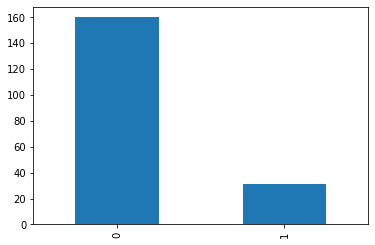

In [11]:
y_train.value_counts().plot(kind = 'bar')

In [12]:
# save
root = '00 - Dataset/03 - Sampling Splits/'
path = root + '00 - Original/'

X_train.to_csv(path + 'X_train.csv', index = False)
y_train.to_csv(path + 'y_train.csv', index = False)

X_test.to_csv(path + 'X_test.csv', index = False)
y_test.to_csv(path + 'y_test.csv', index = False)

# EditedNearestNeighbours Under-sampling

In [13]:
enn = EditedNearestNeighbours(sampling_strategy = 'majority', n_neighbors = 10)
X_enn, y_enn = enn.fit_resample(X_train, y_train)

<AxesSubplot:>

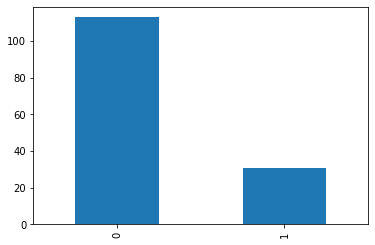

In [14]:
y_enn.value_counts().plot(kind = 'bar')

In [15]:
# save
path = root + '01 - ENN/'

X_enn.to_csv(path + 'X_train.csv', index = False)
y_enn.to_csv(path + 'y_train.csv', index = False)

X_test.to_csv(path + 'X_test.csv', index = False)
y_test.to_csv(path + 'y_test.csv', index = False)

# SMOTE Over-sampling

In [16]:
smote = SMOTE(sampling_strategy = 'minority', random_state = seed)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

<AxesSubplot:>

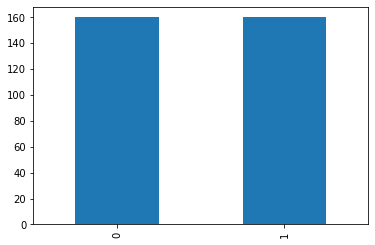

In [17]:
y_sm.value_counts().plot(kind = 'bar')

In [18]:
# save
path = root + '02 - SMOTE/'

X_sm.to_csv(path + 'X_train.csv', index = False)
y_sm.to_csv(path + 'y_train.csv', index = False)

X_test.to_csv(path + 'X_test.csv', index = False)
y_test.to_csv(path + 'y_test.csv', index = False)

# SMOTEENN

In [19]:
smt = SMOTEENN(
    sampling_strategy = 'auto', 
    random_state = seed,
    smote = smote,
    enn = enn
)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

<AxesSubplot:>

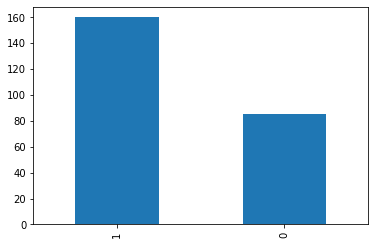

In [20]:
y_smt.value_counts().plot(kind = 'bar')

In [21]:
# save
path = root + '03 - SMOTEENN/'

X_smt.to_csv(path + 'X_train.csv', index = False)
y_smt.to_csv(path + 'y_train.csv', index = False)

X_test.to_csv(path + 'X_test.csv', index = False)
y_test.to_csv(path + 'y_test.csv', index = False)